In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
HP=pd.read_csv(r'C:\Users\yashu\Downloads\Projects\House Price Prediction\Housing.csv')

In [1]:
#data cleaning

In [3]:
HP.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
HP.shape

(545, 13)

In [5]:
HP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
HP.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
HP.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
categorical=[var for var in HP.columns if HP[var].dtype=='O']
print('there are {} categorical variables\n'.format(len(categorical)))
print('the categorical variables are: \n\n',categorical)

there are 7 categorical variables

the categorical variables are: 

 ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [9]:
for var in categorical:
    print(var,'contains',len(HP[var].unique()),'labels')

mainroad contains 2 labels
guestroom contains 2 labels
basement contains 2 labels
hotwaterheating contains 2 labels
airconditioning contains 2 labels
prefarea contains 2 labels
furnishingstatus contains 3 labels


In [10]:
numerical=[var for var in HP.columns if HP[var].dtype!='O']
print('there are {} numerical variables\n'.format(len(numerical)))
print('the numerical variables are: \n\n',numerical)

there are 6 numerical variables

the numerical variables are: 

 ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [11]:
for var in numerical:
    print(var,'contains',len(HP[var].unique()),'labels')

price contains 219 labels
area contains 284 labels
bedrooms contains 6 labels
bathrooms contains 4 labels
stories contains 4 labels
parking contains 4 labels


In [ ]:
#converting categorial data into numerical data

In [12]:
import sklearn.preprocessing as pp
le=pp.LabelEncoder()


In [13]:
HPle=HP
HPle.mainroad=le.fit_transform(HPle.mainroad)
HPle.guestroom=le.fit_transform(HPle.guestroom)
HPle.basement=le.fit_transform(HPle.basement)
HPle.hotwaterheating=le.fit_transform(HPle.hotwaterheating)
HPle.airconditioning =le.fit_transform(HPle.airconditioning )
HPle.prefarea=le.fit_transform(HPle.prefarea)
HPle.furnishingstatus=le.fit_transform(HPle.furnishingstatus)
HPle

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


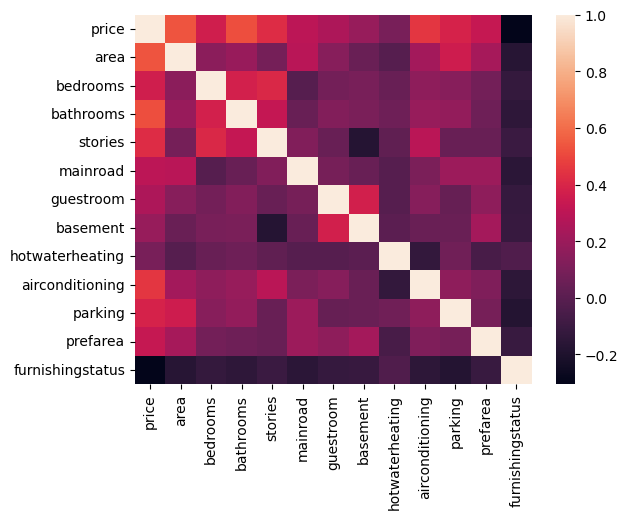

In [17]:
sns.heatmap(HP.corr(),annot=False)
plt.show()

In [14]:
x=HP.drop(['price'],axis=1)
y=HP['price']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [18]:
x_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
454,4500,3,1,2,1,0,0,0,1,0,0,2
392,3990,3,1,2,1,0,0,0,0,0,0,1
231,4320,3,1,1,1,0,0,0,0,0,1,1
271,1905,5,1,2,0,0,1,0,0,0,0,1
250,3510,3,1,3,1,0,0,0,0,0,0,1


In [19]:
y_train.head()

454    3143000
392    3500000
231    4690000
271    4340000
250    4515000
Name: price, dtype: int64

In [40]:
x_train.shape

(381, 12)

In [26]:
from sklearn import linear_model

In [27]:
regression_model=linear_model.LinearRegression()
regression_model.fit(x_train,y_train)
print(regression_model.intercept_)
print(regression_model.coef_)

107133.47334964108
[ 2.48857876e+02  1.34994406e+05  9.50583380e+05  4.18321569e+05
  4.66890751e+05  3.68497644e+05  3.59364424e+05  1.24665331e+06
  8.97037026e+05  2.23301809e+05  6.96754525e+05 -2.30222653e+05]


In [29]:
training_data_prediction=regression_model.predict(x_train)

In [33]:
from sklearn.metrics import r2_score
train_error_score=r2_score(y_train,training_data_prediction)
print("R squared error- Training:",train_error_score )

R squared error- Training: 0.6575703217254214


In [37]:
y_pred=regression_model.predict(x_test)
from sklearn.metrics import r2_score
test_error_score=r2_score(y_test,y_pred)
print("R squared error- Training:",test_error_score)

R squared error- Training: 0.723501522320035


<AxesSubplot:xlabel='price'>

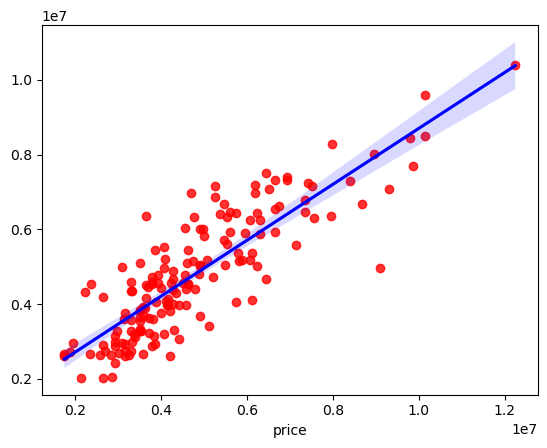

In [38]:
sns.regplot(y_test,y_pred,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [44]:
regression_model.predict([[4500,3,1,2,1,0,0,0,1,0,0,2]])

array([4322686.12091096])